In [224]:
import numpy as np
import pandas as pd

# Import and store the data in a data frame

In [225]:
df = pd.read_table("airq402.dat.txt",sep='\s+',
                   names = ['city1',
                           'city2',
                           'average_fare',
                           'distance',
                           'average_weekly_passengers',
                           'market_leading_airline',
                           'market_share',
                           'average_fare_2',
                           'low_price_airline',
                           'market_share_2',
                           'price']
                  )

In [226]:
df.head()

,city1,city2,average_fare,distance,average_weekly_passengers,market_leading_airline,market_share,average_fare_2,low_price_airline,market_share_2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# Remove the outliers from the data

C:\Users\Gaurav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


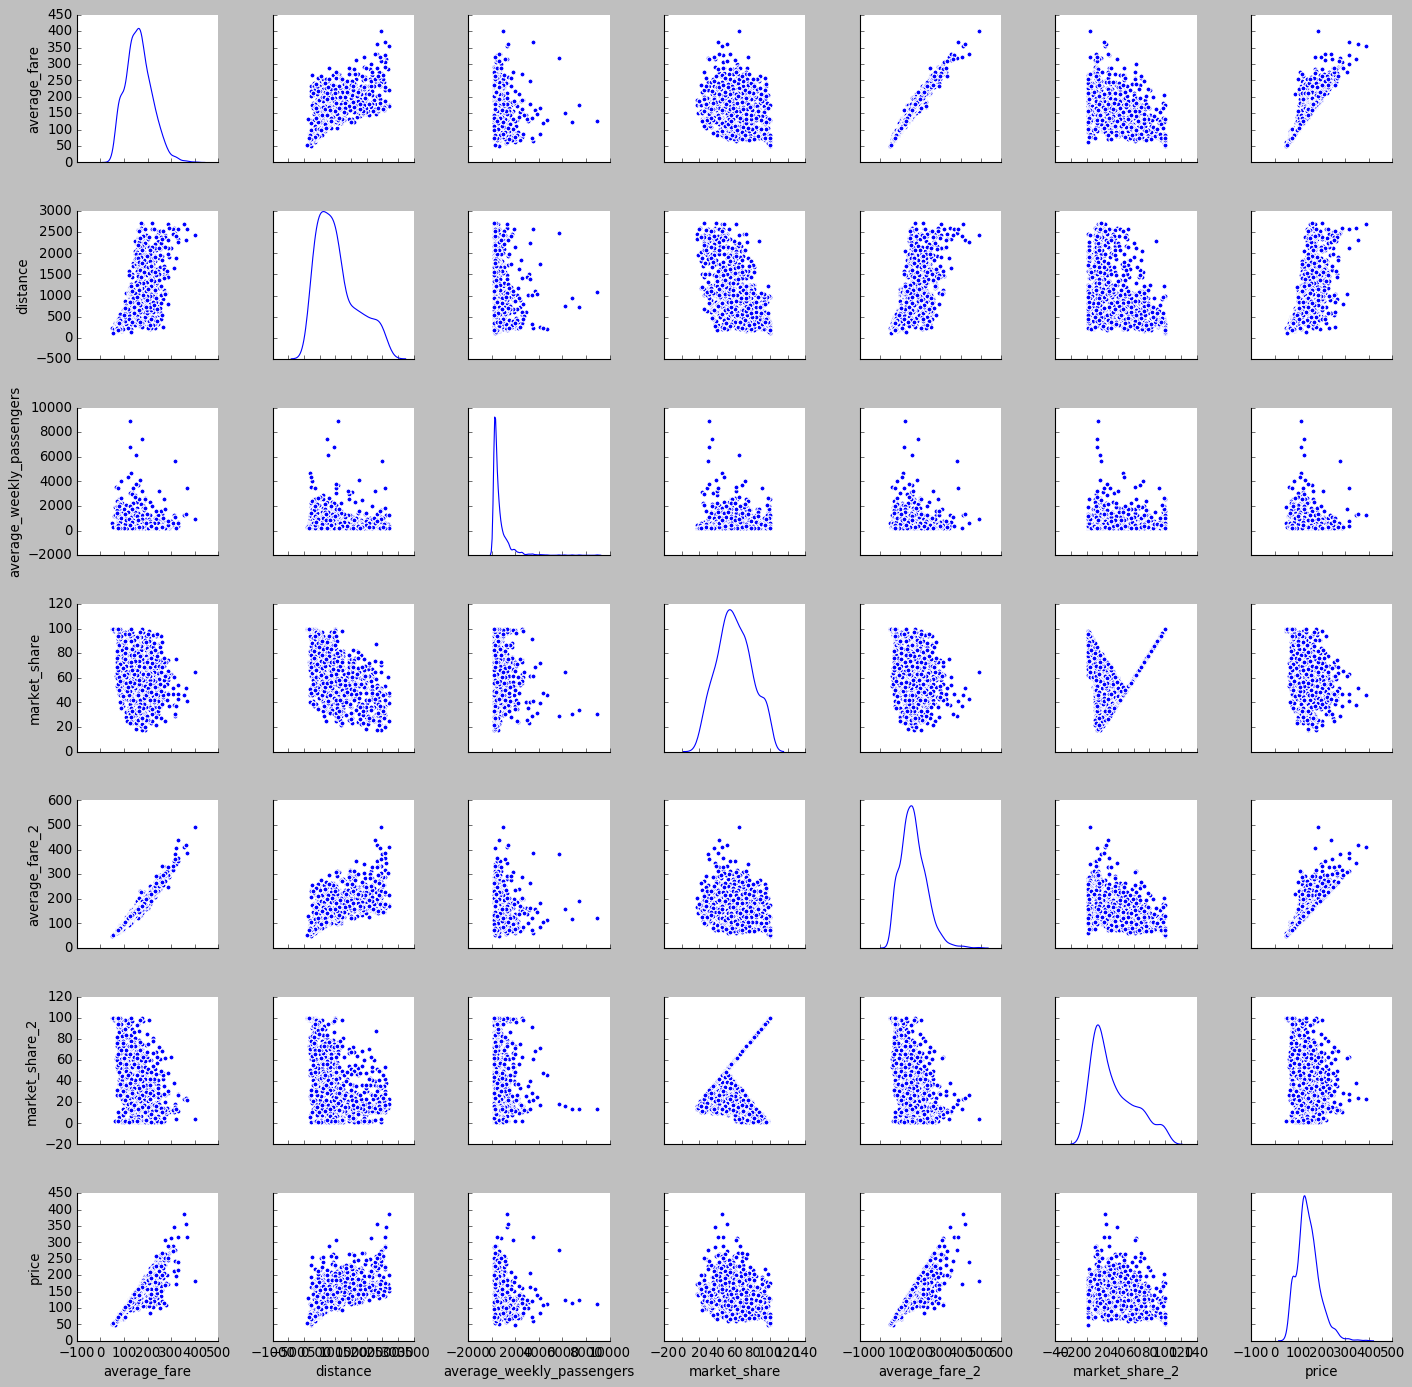

In [227]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [228]:
df.shape

(1000, 11)

In [229]:



#def remove_outlier(df_in, col_name):
#    q1 = df_in[col_name].quantile(0.25)
#    q3 = df_in[col_name].quantile(0.75)
#    iqr = q3-q1 #Interquartile range
#    fence_low  = q1-1.5*iqr
#    fence_high = q3+1.5*iqr
#    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#    return df_out

In [230]:
df.describe()

,average_fare,distance,average_weekly_passengers,market_share,average_fare_2,market_share_2,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [231]:
#new_df = pd.get_dummies(df)

In [232]:
#new_df.dtypes

In [233]:
#new_df.describe()
#new_df.shape

In [234]:
q3 = df.quantile(.75)
q1 = df.quantile(.25)
iqr = q3 - q1

left_range = q1 - 1.5*iqr
right_range = q3 + 1.5*iqr

iqr
#new_df_1 = new_df[(new_df>left_range) & (new_df<right_range)].dropna()
#new_df_1
#df.dtypes

average_fare                  71.4175
distance                     899.0000
average_weekly_passengers    512.7150
market_share                  27.0000
average_fare_2                78.8925
market_share_2                39.7775
price                         54.7625
dtype: float64

In [235]:
#Select only numerical variables
df_new_test = df.select_dtypes(['number']) 

In [236]:
df_new_test.dtypes

average_fare                 float64
distance                       int64
average_weekly_passengers    float64
market_share                 float64
average_fare_2               float64
market_share_2               float64
price                        float64
dtype: object

In [237]:
new_df_clean = df_new_test[(df_new_test>left_range) & (df_new_test<right_range)].dropna()

In [238]:
new_df_clean.shape

(885, 7)

C:\Users\Gaurav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


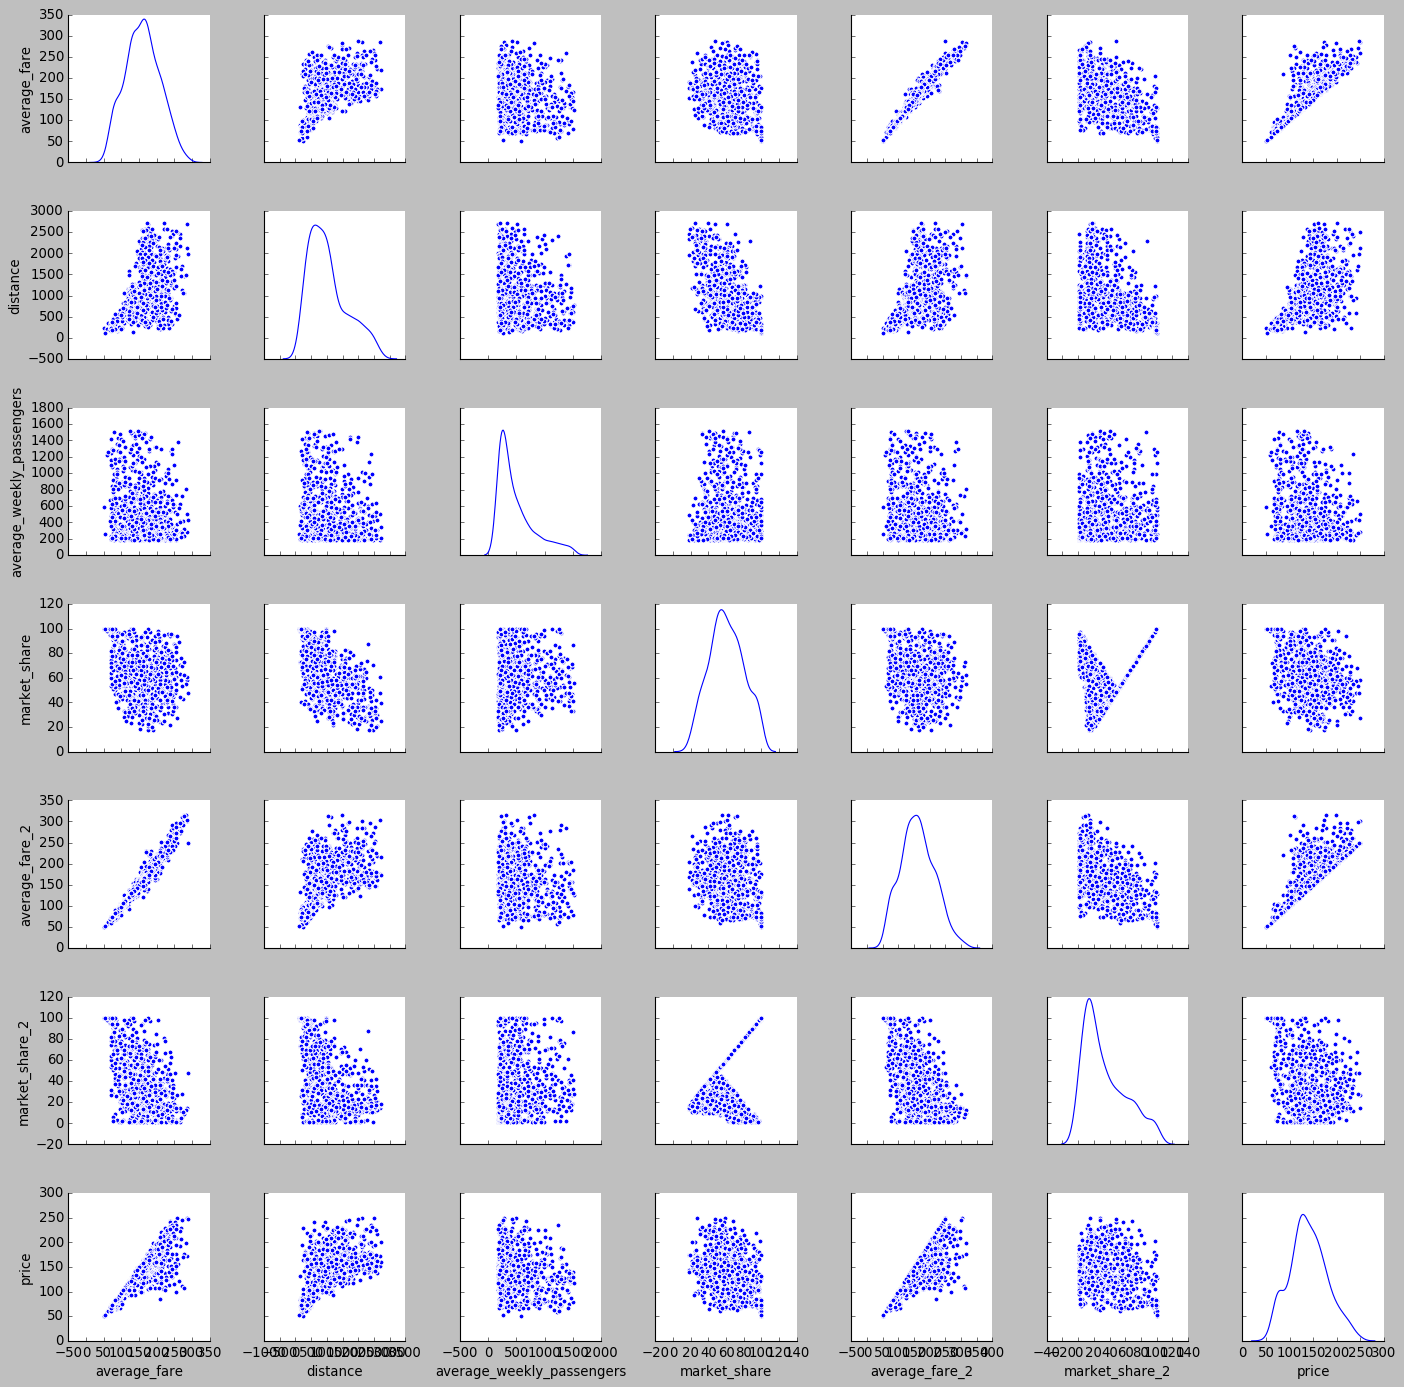

In [239]:
sns.pairplot(new_df_clean,diag_kind='kde')

In [240]:
new_df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
average_fare,885.0,160.292068,48.468895,50.52,126.60,160.71,194.05,288.58
distance,885.0,1039.383051,615.224361,108.00,564.00,914.00,1381.00,2724.00
average_weekly_passengers,885.0,499.132644,327.573566,181.41,249.02,372.93,644.56,1519.89
market_share,885.0,60.636938,19.361447,17.68,47.02,59.75,74.66,100.00
average_fare_2,885.0,162.589051,53.288002,50.52,125.59,160.74,198.47,315.86
market_share_2,885.0,34.373028,27.183305,1.06,13.06,26.25,52.93,100.00
price,885.0,140.431073,39.849789,50.52,115.11,138.02,166.26,250.02


# Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table. 

In [241]:
new_df_clean.isnull().any()

average_fare                 False
distance                     False
average_weekly_passengers    False
market_share                 False
average_fare_2               False
market_share_2               False
price                        False
dtype: bool

In [242]:
y = new_df_clean[['average_fare']]
x = new_df_clean.drop('average_fare',axis=1)

In [243]:
y.dtypes

average_fare    float64
dtype: object

In [244]:
x.dtypes

distance                       int64
average_weekly_passengers    float64
market_share                 float64
average_fare_2               float64
market_share_2               float64
price                        float64
dtype: object

In [245]:
y.shape

(885, 1)

In [246]:
x.shape

(885, 6)

# Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)


In [273]:
#x_drop.dropna(axis= 0)

In [274]:
new_df_clean.corr()

,average_fare,distance,average_weekly_passengers,market_share,average_fare_2,market_share_2,price
average_fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
average_weekly_passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market_share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
average_fare_2,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market_share_2,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


As the absolute correlation is greater than .1 not dropping any variable

In [276]:
x.dtypes

distance                       int64
average_weekly_passengers    float64
market_share                 float64
average_fare_2               float64
market_share_2               float64
price                        float64
dtype: object

In [255]:
x.columns

Index(['distance', 'average_weekly_passengers', 'market_share',
       'average_fare_2', 'market_share_2', 'price'],
      dtype='object')

# Create scatter Plot of Independent Variable vs Dependent Variable. 


Text(0,0.5,'Average Fare')

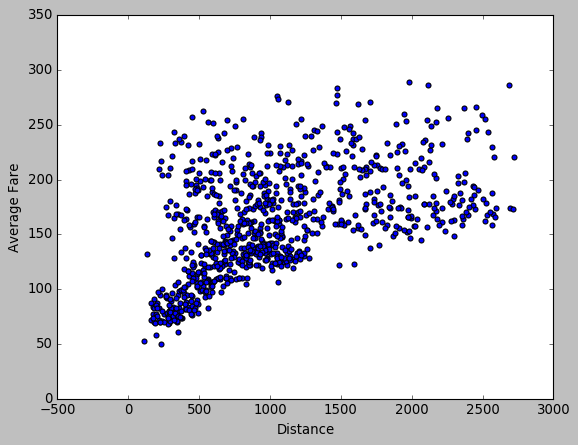

In [278]:
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
plt.scatter(x='distance', y='average_fare',data=new_df_clean)
plt.xlabel('Distance')
plt.ylabel('Average Fare')

Text(0,0.5,'Average Fare')

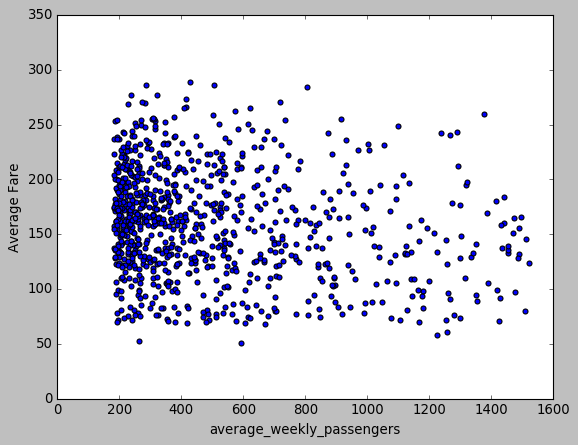

In [280]:
plt.scatter(x='average_weekly_passengers', y='average_fare',data=new_df_clean)
plt.xlabel('average_weekly_passengers')
plt.ylabel('Average Fare')

Text(0,0.5,'Average Fare')

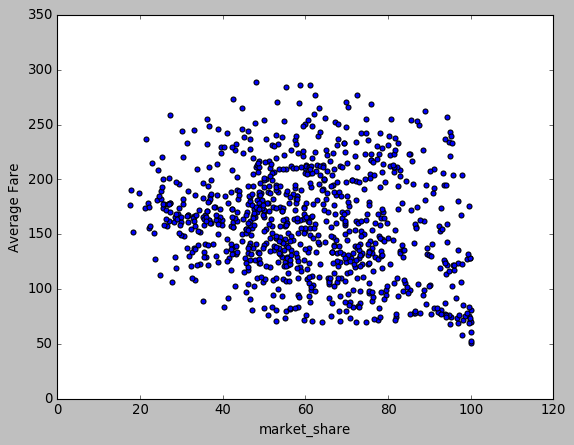

In [283]:
plt.scatter(x='market_share', y='average_fare',data=new_df_clean)
plt.xlabel('market_share')
plt.ylabel('Average Fare')

Text(0,0.5,'Average Fare')

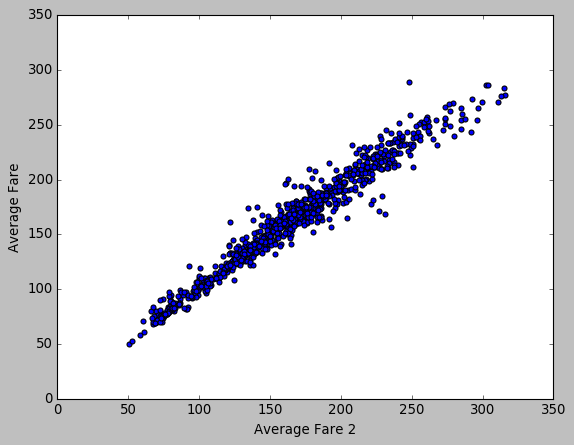

In [257]:
plt.scatter(x='average_fare_2', y='average_fare',data=new_df_clean)
plt.xlabel('Average Fare 2')
plt.ylabel('Average Fare')

Text(0,0.5,'Average Fare')

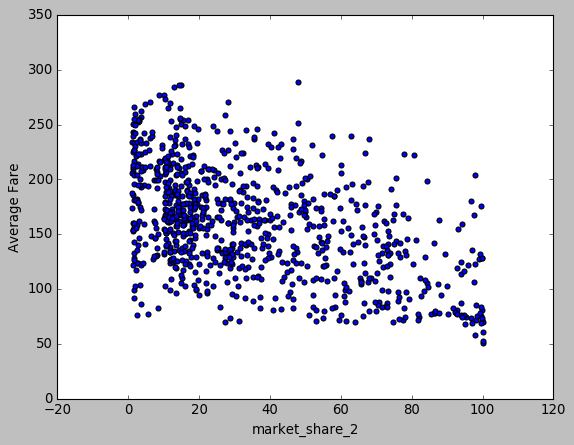

In [282]:
plt.scatter(x='market_share_2', y='average_fare',data=new_df_clean)
plt.xlabel('market_share_2')
plt.ylabel('Average Fare')

Text(0,0.5,'Average Fare')

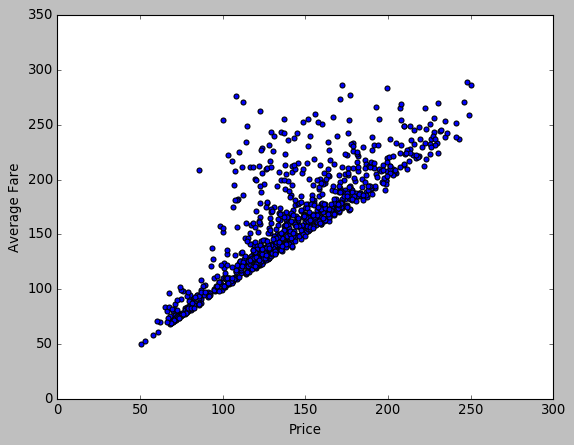

In [258]:
plt.scatter(x='price', y='average_fare',data=new_df_clean)
plt.xlabel('Price')
plt.ylabel('Average Fare')

# Divide the data set into training and test data set and build a Multiple Linear Regression model

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20 , random_state=1)

In [261]:
X_train.shape

(708, 6)

In [262]:
X_test.shape

(177, 6)

In [263]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Print the coefficients & intercepts of the linear regression model 

In [264]:
#mse = np.mean((regression_model.predict(X_train)-y_train)**2)

In [265]:
#import math

#math.sqrt(mse)

In [266]:
print("Score of the model is",regression_model.score(X_train, y_train))

Score of the model is 0.9724453942703206


In [267]:
#y_pred = regression_model.predict(X_test)

In [268]:
#plt.scatter(y_test, y_pred)

In [269]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for distance is 0.0026805555808757132
The coefficient for average_weekly_passengers is -0.0034012568440139937
The coefficient for market_share is 0.07798353184531553
The coefficient for average_fare_2 is 0.7298591183630754
The coefficient for market_share_2 is -0.03205602981539781
The coefficient for price is 0.23200788195185637


In [270]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.084548338987787


In [271]:
pd.DataFrame(regression_model.coef_[0],X_train.columns)

,0
distance,0.002681
average_weekly_passengers,-0.003401
market_share,0.077984
average_fare_2,0.729859
market_share_2,-0.032056
price,0.232008


In [272]:
#df.select_dtypes()